In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import aplicar_one_hot_encoding

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [5]:
df = traer_df()
df = preparar_dataset(df)
df = aplicar_one_hot_encoding(df)

In [6]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    for criterio in ['gini', 'entropy']:
        for estimadores in [1,10,20,50,100,200]:
            for profundidad in [2,3,4,5,6,7,8,9,10]: 
                kf = KFold(n_splits=5)
                metricas_de_la_combinacion = []
                for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                    random_forest = RandomForestClassifier(max_depth=profundidad,n_estimators=estimadores,criterion=criterio,min_samples_leaf = 0.05)
                    random_forest.fit(X.iloc[train_index], y.iloc[train_index])
                    y_pred = random_forest.predict_proba(X.iloc[test_index])[:,1]
                    metricas_de_la_combinacion.append(roc_auc_score(y.iloc[test_index], y_pred))
                    print(roc_auc_score(y.iloc[test_index], y_pred))
                print(f"Promedio de la combinacion {np.mean(metricas_de_la_combinacion)}")
                metrics.append((profundidad,estimadores,criterio,np.mean(metricas_de_la_combinacion)))
    df_metrics = pd.DataFrame(metrics, columns=['profundidad','estimadores','criterio','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

In [13]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)
print(mejor_combinacion)

0.6910728530502165
0.705238369255742
0.8279841518001448
0.7023155590422216
0.6503528348941368
Promedio de la combinacion 0.7153927536084923
0.8100001132961825
0.7351817780874612
0.7823810334629908
0.7250812756266108
0.7270475366449511
Promedio de la combinacion 0.7559383474236393
0.752163828339804
0.7132577566566716
0.8126593213277283
0.8076030728557388
0.840045042752443
Promedio de la combinacion 0.7851458043864772
0.6715109796875394
0.7700008090044809
0.7527095601056599
0.778611512266095
0.7361515803135179
Promedio de la combinacion 0.7417968882754586
0.7727793561995928
0.8193367076649261
0.7097459222780532
0.8242202651681536
0.8442690731881106
Promedio de la combinacion 0.7940702648997673
0.7778208432016884
0.7701112642130343
0.8172512746681804
0.7294990965664389
0.8078373753053745
Promedio de la combinacion 0.7805039707909434
0.5
0.745875447235945
0.7583867553400652
0.8013897515647613
0.7619795271783387
Promedio de la combinacion 0.713526296263822
0.7392633198974361
0.8137721921672

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.87      0.95      0.91      6159
   Tiene Alto Valor Adquisitivo       0.78      0.56      0.65      1982

                       accuracy                           0.85      8141
                      macro avg       0.83      0.76      0.78      8141
                   weighted avg       0.85      0.85      0.85      8141



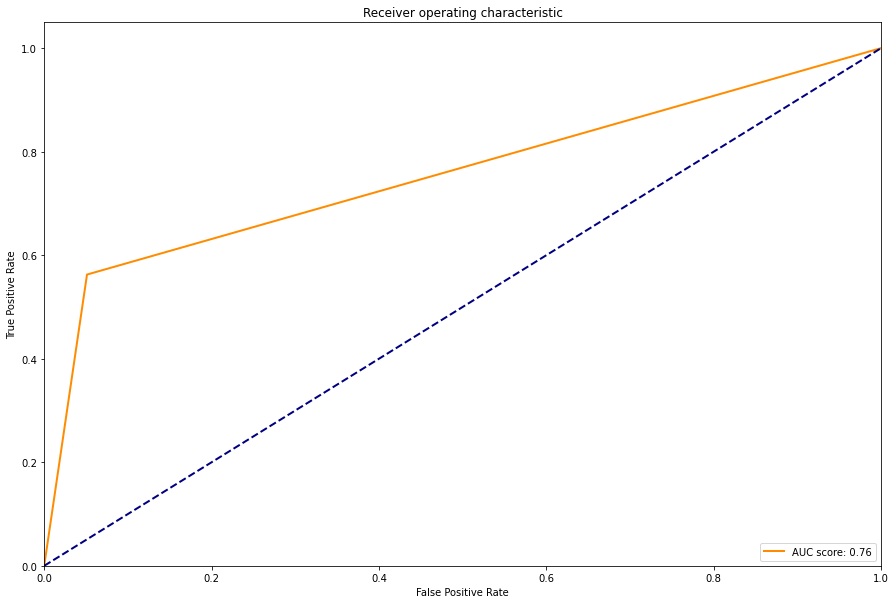

0.7557092006332689

In [9]:
parametros_random_forest = mejor_combinacion.loc[:].values[0]
random_forest = RandomForestClassifier(max_depth = parametros_random_forest[0], n_estimators = parametros_random_forest[1], 
                                       criterion = parametros_random_forest[2])
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)